**Importing data**

In [1]:
import pandas as pd

df = pd.read_csv("E:\GC4_CatS.zip\CatS\CatS_score_compounds_D3R_GC4_answers.csv")
print(df.head())


<>:3: SyntaxWarning: invalid escape sequence '\G'
<>:3: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Boobalan\AppData\Local\Temp\ipykernel_4856\3753973718.py:3: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("E:\GC4_CatS.zip\CatS\CatS_score_compounds_D3R_GC4_answers.csv")


  Cmpd_ID                                             SMILES  Affinity
0  CatS_1  CC(C)N1CCN(CC1)C(=O)CSc2cc(ccc2C(F)(F)F)c3c4c(...      1.23
1  CatS_2  CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...      3.42
2  CatS_3  CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...      0.31
3  CatS_4  CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...      0.07
4  CatS_5  CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...      0.12


In [3]:
print(df.columns)
print(df.shape)

Index(['Cmpd_ID', 'SMILES', 'Affinity'], dtype='object')
(459, 3)


In [5]:
df['SMILES'].duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cmpd_ID   459 non-null    object 
 1   SMILES    459 non-null    object 
 2   Affinity  459 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.9+ KB


In [8]:
print("Total compounds:", len(df))
print("Unique SMILES:", df['SMILES'].nunique())
print(df['Affinity'].describe())


Total compounds: 459
Unique SMILES: 459
count    459.000000
mean       0.469236
std        0.943299
min        0.006500
25%        0.070000
50%        0.180000
75%        0.480000
max       10.060000
Name: Affinity, dtype: float64


In [9]:
import numpy as np
df['pAffinity'] = -np.log10(df['Affinity'] * 1e-9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cmpd_ID    459 non-null    object 
 1   SMILES     459 non-null    object 
 2   Affinity   459 non-null    float64
 3   pAffinity  459 non-null    float64
dtypes: float64(2), object(2)
memory usage: 14.5+ KB


In [13]:
df['pAffinity'].describe()

count    459.000000
mean       9.744767
std        0.601183
min        7.997402
25%        9.318759
50%        9.744727
75%       10.154902
max       11.187087
Name: pAffinity, dtype: float64

In [14]:
df['Affinity'].describe()

count    459.000000
mean       0.469236
std        0.943299
min        0.006500
25%        0.070000
50%        0.180000
75%        0.480000
max       10.060000
Name: Affinity, dtype: float64

**calculating deltaG**

In [15]:
R = 8.314       # J/mol/K
T = 298.15     # K

df['DeltaG_kcal_mol'] = (R * T * np.log(df['Affinity'] * 1e-9)) / 4184

In [18]:
df.describe

<bound method NDFrame.describe of       Cmpd_ID                                             SMILES  Affinity  \
0      CatS_1  CC(C)N1CCN(CC1)C(=O)CSc2cc(ccc2C(F)(F)F)c3c4c(...     1.230   
1      CatS_2  CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...     3.420   
2      CatS_3  CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...     0.310   
3      CatS_4  CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...     0.070   
4      CatS_5  CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...     0.120   
..        ...                                                ...       ...   
454  CatS_455  CN(C)Cc1cc(ccc1Cl)C#Cc2cc(ccc2Cl)c3c4c(n(n3)CC...     0.030   
455  CatS_456  C[C@H]1COCCN1CCCn2c3c(c(n2)c4ccc(c(c4)C#Cc5ccc...     0.012   
456  CatS_457  CN(C)Cc1cc(ccc1Cl)C#Cc2cc(ccc2Cl)c3c4c(n(n3)CC...     0.040   
457  CatS_458  C[C@H]1COCCN1CCCn2c3c(c(n2)c4ccc(c(c4)C#Cc5ccc...     0.020   
458  CatS_459  C[C@H]1COCCN1CCCn2c3c(c(n2)c4ccc(c(c4)C#Cc5ccc...     0.020   

     pAffinity  DeltaG_kcal_m

In [19]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

In [20]:
# -----------------------------
# Function to compute MMFF energy
# -----------------------------
def calc_mmff_energy(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.nan

        mol = Chem.AddHs(mol)

        # Embed 3D conformer
        AllChem.EmbedMolecule(mol, randomSeed=42)

        # Optimize geometry
        AllChem.MMFFOptimizeMolecule(mol)

        # Compute MMFF energy
        props = AllChem.MMFFGetMoleculeProperties(mol)
        ff = AllChem.MMFFGetMoleculeForceField(mol, props)

        energy = ff.CalcEnergy()  # kcal/mol
        return energy

    except Exception:
        return np.nan

In [21]:
# -----------------------------
# Apply to dataset
# -----------------------------
df["MMFF_Energy_kcal_mol"] = df["SMILES"].apply(calc_mmff_energy)

In [ ]:
# -----------------------------
# Basic sanity check
# -----------------------------
df[["Cmpd_ID", "SMILES", "MMFF_Energy_kcal_mol"]].head()

,Cmpd_ID,SMILES,MMFF_Energy_kcal_mol
0,CatS_1,CC(C)N1CCN(CC1)C(=O)CSc2cc(ccc2C(F)(F)F)c3c4c(...,54.353335
1,CatS_2,CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...,-11.879874
2,CatS_3,CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...,6.674107
3,CatS_4,CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...,-18.774467
4,CatS_5,CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...,52.045069


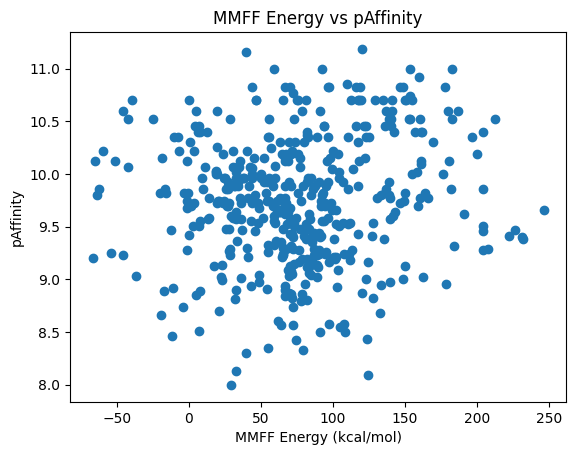

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (with pAffinity + MMFF energy already computed)
#df = pd.read_csv("data_with_mmff_energy.csv")

# Basic cleanup (recommended)
df_plot = df.dropna(subset=["MMFF_Energy_kcal_mol", "pAffinity"])

# Scatter plot
plt.figure()
plt.scatter(
    df_plot["MMFF_Energy_kcal_mol"],
    df_plot["pAffinity"]
)

plt.xlabel("MMFF Energy (kcal/mol)")
plt.ylabel("pAffinity")
plt.title("MMFF Energy vs pAffinity")

plt.show()


In [27]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors

In [28]:
# Function to compute LogP
# -----------------------------
def calc_logp(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.nan
        return Descriptors.MolLogP(mol)
    except Exception:
        return np.nan

In [29]:
# -----------------------------
# Apply to dataset
# -----------------------------
df["LogP"] = df["SMILES"].apply(calc_logp)

In [30]:
df

,Cmpd_ID,SMILES,Affinity,pAffinity,DeltaG_kcal_mol,MMFF_Energy_kcal_mol,LogP
0,CatS_1,CC(C)N1CCN(CC1)C(=O)CSc2cc(ccc2C(F)(F)F)c3c4c(...,1.230,8.910095,-12.154894,54.353335,4.0082
1,CatS_2,CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...,3.420,8.465974,-11.549037,-11.879874,3.6174
2,CatS_3,CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...,0.310,9.508638,-12.971410,6.674107,5.7299
3,CatS_4,CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...,0.070,10.154902,-13.853024,-18.774467,5.1867
4,CatS_5,CS(=O)(=O)N1CCc2c(c(nn2CCCN3CCC(CC3)N4CCCC4=O)...,0.120,9.920819,-13.533694,52.045069,5.1867
...,...,...,...,...,...,...,...
454,CatS_455,CN(C)Cc1cc(ccc1Cl)C#Cc2cc(ccc2Cl)c3c4c(n(n3)CC...,0.030,10.522879,-14.355007,28.532794,5.1940
455,CatS_456,C[C@H]1COCCN1CCCn2c3c(c(n2)c4ccc(c(c4)C#Cc5ccc...,0.012,10.920819,-14.897865,160.067848,3.7991
456,CatS_457,CN(C)Cc1cc(ccc1Cl)C#Cc2cc(ccc2Cl)c3c4c(n(n3)CC...,0.040,10.397940,-14.184569,6.110816,5.5120
457,CatS_458,C[C@H]1COCCN1CCCn2c3c(c(n2)c4ccc(c(c4)C#Cc5ccc...,0.020,10.698970,-14.595226,155.226021,2.5764


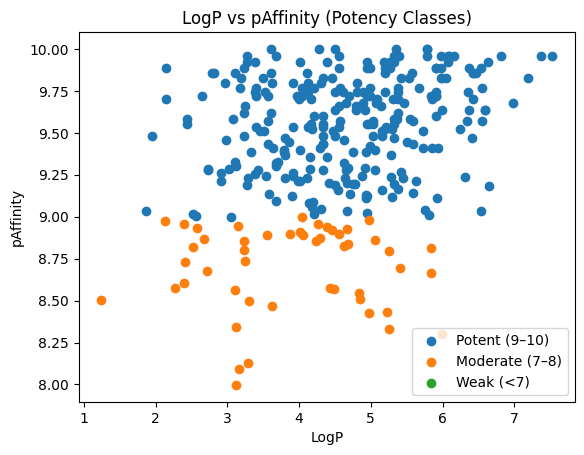

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop missing values
df = df.dropna(subset=["LogP", "pAffinity"])

# Define potency classes
potent = df[(df["pAffinity"] >= 9) & (df["pAffinity"] <= 10)]
moderate = df[(df["pAffinity"] >= 7) & (df["pAffinity"] < 9)]
weak = df[df["pAffinity"] < 7]

# Plot
plt.figure()

plt.scatter(potent["LogP"], potent["pAffinity"], label="Potent (9–10)")
plt.scatter(moderate["LogP"], moderate["pAffinity"], label="Moderate (7–8)")
plt.scatter(weak["LogP"], weak["pAffinity"], label="Weak (<7)")

plt.xlabel("LogP")
plt.ylabel("pAffinity")
plt.title("LogP vs pAffinity (Potency Classes)")
plt.legend()

plt.show()


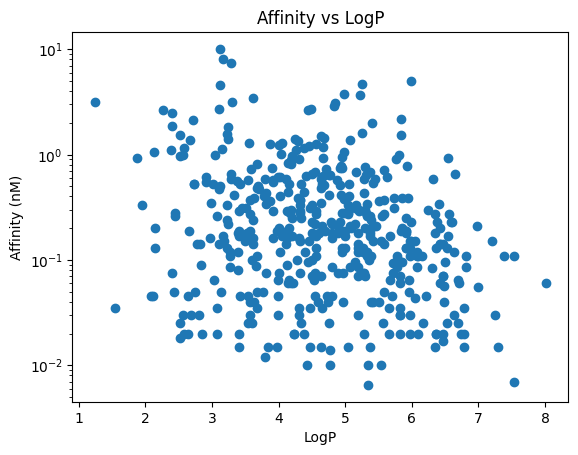

In [32]:
# Drop missing values
df_plot = df.dropna(subset=["LogP", "Affinity"])

# Scatter plot
plt.figure()
plt.scatter(df_plot["LogP"], df_plot["Affinity"])

plt.xlabel("LogP")
plt.ylabel("Affinity (nM)")
plt.title("Affinity vs LogP")

# Use log scale for affinity (IMPORTANT)
plt.yscale("log")

plt.show()


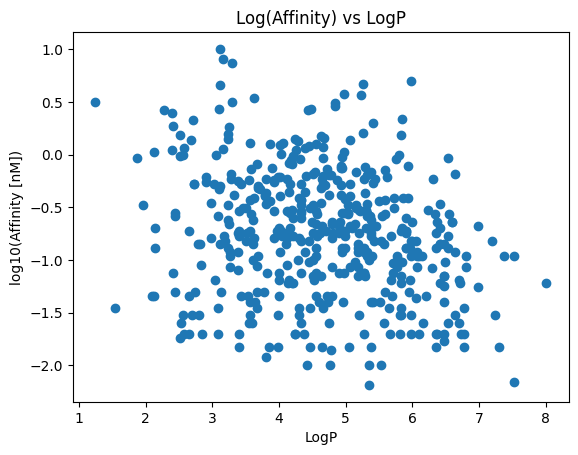

In [33]:
# Drop invalid values
df_plot = df.dropna(subset=["Affinity", "LogP"])
df_plot = df_plot[df_plot["Affinity"] > 0]   # log requires positive values

# Convert Affinity to log10 scale (nM)
df_plot["logAffinity"] = np.log10(df_plot["Affinity"])

# Scatter plot
plt.figure()
plt.scatter(df_plot["LogP"], df_plot["logAffinity"])

plt.xlabel("LogP")
plt.ylabel("log10(Affinity [nM])")
plt.title("Log(Affinity) vs LogP")

plt.show()


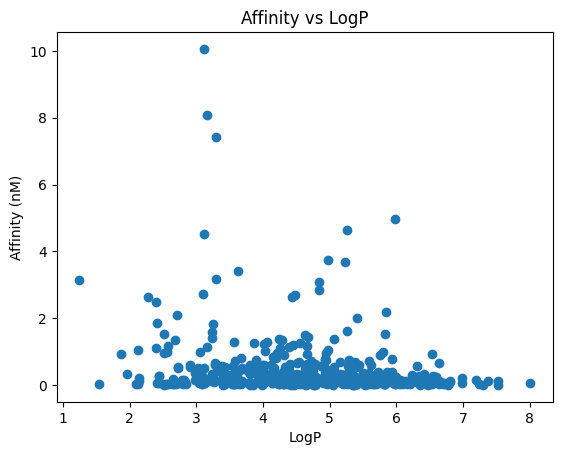

In [34]:
import pandas as pd
import matplotlib.pyplot as plt



# Drop missing values
df_plot = df.dropna(subset=["Affinity", "LogP"])

# Scatter plot
plt.figure()
plt.scatter(df_plot["LogP"], df_plot["Affinity"])

plt.xlabel("LogP")
plt.ylabel("Affinity (nM)")
plt.title("Affinity vs LogP")

plt.show()


In [43]:
# Clean
df = df.dropna(subset=["SMILES", "Affinity"])

# Sort by potency (LOWEST affinity = MOST potent)
top50 = df.sort_values("Affinity", ascending=True).head(50)

print(top50[["Cmpd_ID", "Affinity"]])


      Cmpd_ID  Affinity
157  CatS_158    0.0065
70    CatS_71    0.0070
177  CatS_178    0.0100
380  CatS_381    0.0100
434  CatS_435    0.0100
437  CatS_438    0.0100
455  CatS_456    0.0120
208  CatS_209    0.0140
306  CatS_307    0.0150
122  CatS_123    0.0150
426  CatS_427    0.0150
408  CatS_409    0.0150
119  CatS_120    0.0150
121  CatS_122    0.0150
112  CatS_113    0.0150
414  CatS_415    0.0150
288  CatS_289    0.0150
257  CatS_258    0.0150
209  CatS_210    0.0170
324  CatS_325    0.0180
300  CatS_301    0.0200
260  CatS_261    0.0200
192  CatS_193    0.0200
295  CatS_296    0.0200
120  CatS_121    0.0200
61    CatS_62    0.0200
413  CatS_414    0.0200
411  CatS_412    0.0200
392  CatS_393    0.0200
405  CatS_406    0.0200
457  CatS_458    0.0200
458  CatS_459    0.0200
156  CatS_157    0.0200
179  CatS_180    0.0200
246  CatS_247    0.0200
425  CatS_426    0.0200
428  CatS_429    0.0200
448  CatS_449    0.0200
297  CatS_298    0.0250
305  CatS_306    0.0250
410  CatS_411   

RDKit Grid to visualize molecules

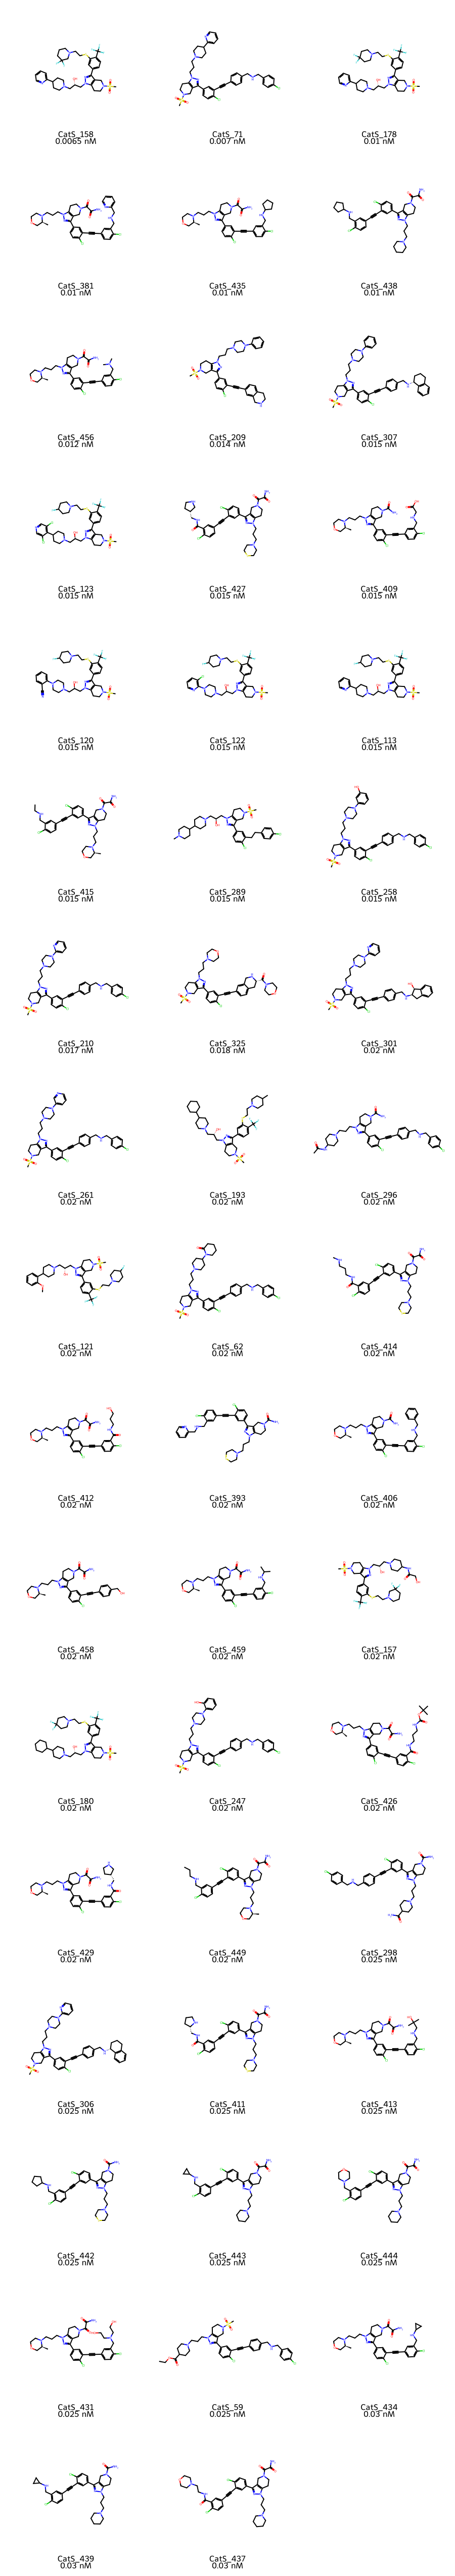

In [47]:
from rdkit import Chem
from rdkit.Chem import Draw

mols = []
legends = []

for _, row in top50.iterrows():
    mol = Chem.MolFromSmiles(row["SMILES"])
    if mol:
        mols.append(mol)
        legends.append(
            f"{row['Cmpd_ID']}\n{row['Affinity']} nM"
        )

# Draw grid
img = Draw.MolsToGridImage(
    mols,
    legends=legends,
    molsPerRow=3,
    subImgSize=(300, 300)
)

img


Computing Bemis–Murcko scaffold SMILES for each molecule to determine the common scafold with the given data

In [48]:
import pandas as pd
from collections import Counter, defaultdict
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw

In [49]:
# 2) Top 50 most potent = lowest Affinity (nM)
top50 = df.sort_values("Affinity", ascending=True).head(50).copy()

In [50]:
# 3) Compute Bemis–Murcko scaffold SMILES for each molecule
def murcko_scaffold_smiles(smiles: str):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaf = MurckoScaffold.GetScaffoldForMol(mol)
    if scaf is None or scaf.GetNumAtoms() == 0:
        return None
    return Chem.MolToSmiles(scaf)

top50["Scaffold"] = top50["SMILES"].apply(murcko_scaffold_smiles)
top50 = top50.dropna(subset=["Scaffold"])

In [53]:
# 4) Count scaffolds and keep the most frequent ones
counts = Counter(top50["Scaffold"])
# choose how many cores you want to visualize:
topN = 3
top_scaffolds = counts.most_common(topN)

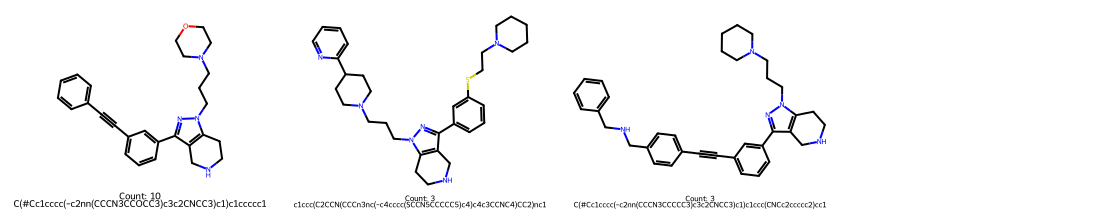

In [54]:
# 5) Make RDKit mols for scaffolds + legends
scaf_mols = []
legends = []
for scaf_smi, n in top_scaffolds:
    m = Chem.MolFromSmiles(scaf_smi)
    if m:
        scaf_mols.append(m)
        legends.append(f"Count: {n}\n{scaf_smi}")

img = Draw.MolsToGridImage(
    scaf_mols,
    legends=legends,
    molsPerRow=4,
    subImgSize=(280, 220),
)
img


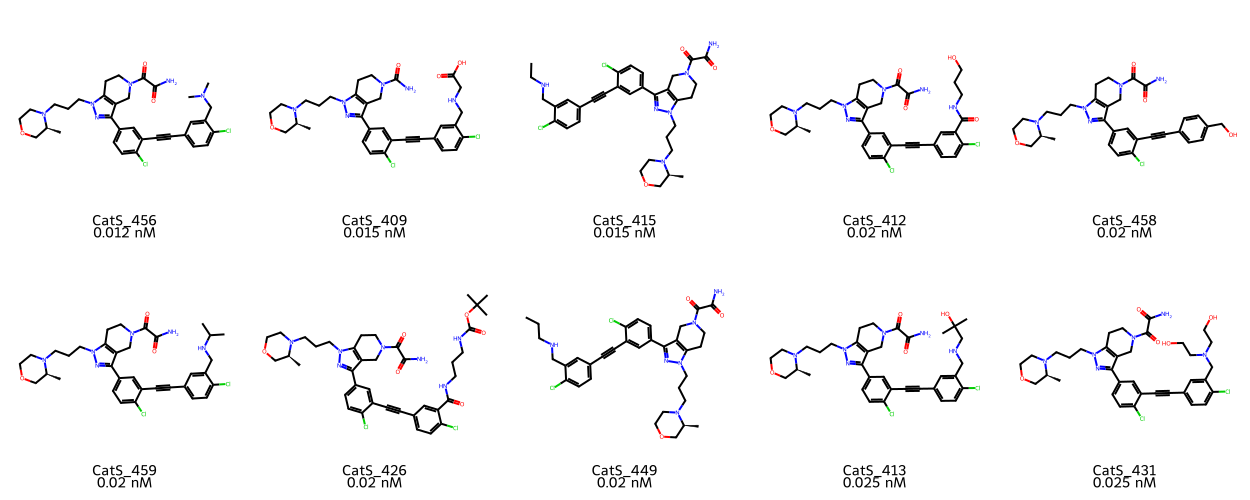

In [55]:
from rdkit.Chem import Draw
from rdkit import Chem

# Most common scaffold
best_scaf = top_scaffolds[0][0]  # scaffold SMILES
subset = top50[top50["Scaffold"] == best_scaf].copy()

mols = []
legends = []
for _, r in subset.iterrows():
    mol = Chem.MolFromSmiles(r["SMILES"])
    if mol:
        mols.append(mol)
        legends.append(f"{r['Cmpd_ID']}\n{r['Affinity']} nM")

img2 = Draw.MolsToGridImage(
    mols,
    legends=legends,
    molsPerRow=5,
    subImgSize=(250, 250),
)
img2


MCS (Maximum Common Substructure) -- the other way of computing common structure

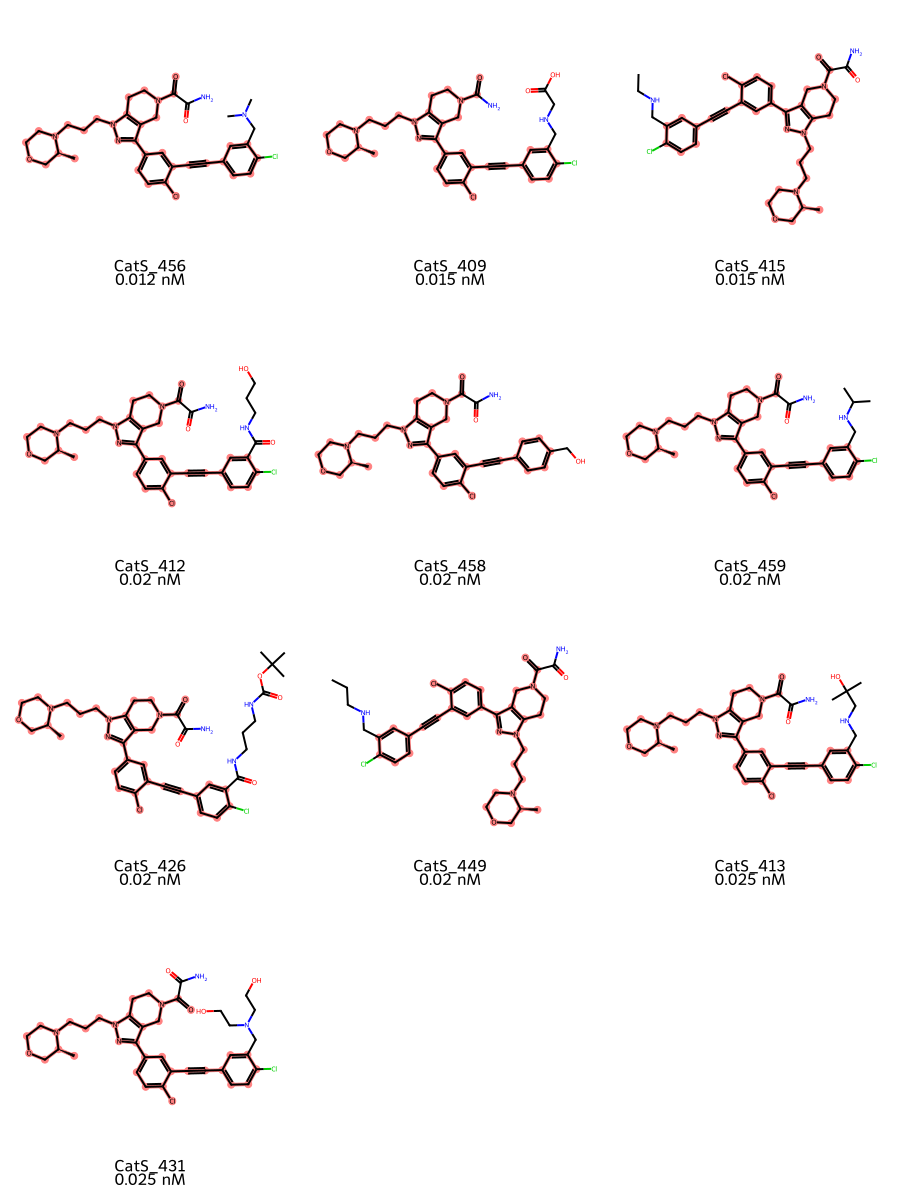

In [57]:
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit import Chem

# Use the subset from above (same scaffold) for a meaningful MCS
mols = [Chem.MolFromSmiles(s) for s in subset["SMILES"]]
mols = [m for m in mols if m is not None]

mcs = rdFMCS.FindMCS(
    mols,
    ringMatchesRingOnly=True,
    completeRingsOnly=True,
    timeout=20  # seconds
)

mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

# Highlight MCS in each molecule
highlight_imgs = []
legends = []
for _, r in subset.iterrows():
    mol = Chem.MolFromSmiles(r["SMILES"])
    if not mol:
        continue
    match = mol.GetSubstructMatch(mcs_mol)
    legends.append(f"{r['Cmpd_ID']}\n{r['Affinity']} nM")
    highlight_imgs.append((mol, match))

img3 = Draw.MolsToGridImage(
    [x[0] for x in highlight_imgs],
    legends=legends,
    highlightAtomLists=[list(x[1]) for x in highlight_imgs],
    molsPerRow=3,
    subImgSize=(300, 300),
)
img3


 ## **Find “minor change → potency drop” pairs (Activity Cliffs)**

In [58]:
import pandas as pd
import numpy as np

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import rdFMCS

In [ ]:
df = df.dropna(subset=["SMILES", "Affinity"])
df = df[df["Affinity"] > 0].copy()

In [59]:
# Compute pAffinity if not present (assumes Affinity is in nM)
if "pAffinity" not in df.columns:
    df["pAffinity"] = -np.log10(df["Affinity"] * 1e-9)

In [60]:
# Parse molecules
df["mol"] = df["SMILES"].apply(Chem.MolFromSmiles)
df = df.dropna(subset=["mol"]).reset_index(drop=True)

In [61]:
# Fingerprints (ECFP4)
def morgan_fp(mol, radius=2, nbits=2048):
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nbits)

In [62]:
df["fp"] = df["mol"].apply(morgan_fp)

[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerator
[13:28:03] DEPRECATION WARNING: please use MorganGenerat

In [63]:
# ----------------------------
# Activity cliff search settings
# ----------------------------
SIM_THRESHOLD = 0.85      # "minor change" (raise to 0.90 if you want stricter)
DELTAP_THRESHOLD = 1.0    # potency drop threshold in pAffinity units (1.0 ~ 10x)

# We'll collect top cliffs by |ΔpAffinity| * similarity
cliffs = []

fps = df["fp"].tolist()
pA = df["pAffinity"].to_numpy()

In [64]:
for i in range(len(df)):
    # compute similarity to later molecules only (avoid duplicates)
    sims = DataStructs.BulkTanimotoSimilarity(fps[i], fps[i+1:])
    for j_offset, sim in enumerate(sims):
        if sim < SIM_THRESHOLD:
            continue
        j = i + 1 + j_offset
        dp = float(pA[i] - pA[j])  # positive means i more potent than j
        if abs(dp) >= DELTAP_THRESHOLD:
            cliffs.append((i, j, sim, dp, abs(dp) * sim))

In [65]:
# Sort: biggest cliff first
cliffs.sort(key=lambda x: x[4], reverse=True)

print(f"Found {len(cliffs)} activity-cliff pairs (sim>={SIM_THRESHOLD}, |ΔpAffinity|>={DELTAP_THRESHOLD}).")
print("Top 10 (i, j, similarity, ΔpAffinity):")
for k in cliffs[:10]:
    i, j, sim, dp, score = k
    print(df.loc[i, "Cmpd_ID"], df.loc[j, "Cmpd_ID"], f"sim={sim:.3f}", f"ΔpA={dp:.2f}")


Found 42 activity-cliff pairs (sim>=0.85, |ΔpAffinity|>=1.0).
Top 10 (i, j, similarity, ΔpAffinity):
CatS_157 CatS_255 sim=0.859 ΔpA=2.10
CatS_325 CatS_385 sim=1.000 ΔpA=1.73
CatS_174 CatS_275 sim=0.856 ΔpA=1.88
CatS_177 CatS_277 sim=0.859 ΔpA=1.84
CatS_177 CatS_255 sim=0.888 ΔpA=1.74
CatS_325 CatS_386 sim=0.955 ΔpA=1.56
CatS_139 CatS_217 sim=0.929 ΔpA=1.51
CatS_219 CatS_231 sim=0.857 ΔpA=-1.51
CatS_204 CatS_205 sim=0.862 ΔpA=1.49
CatS_4 CatS_48 sim=0.851 ΔpA=1.46


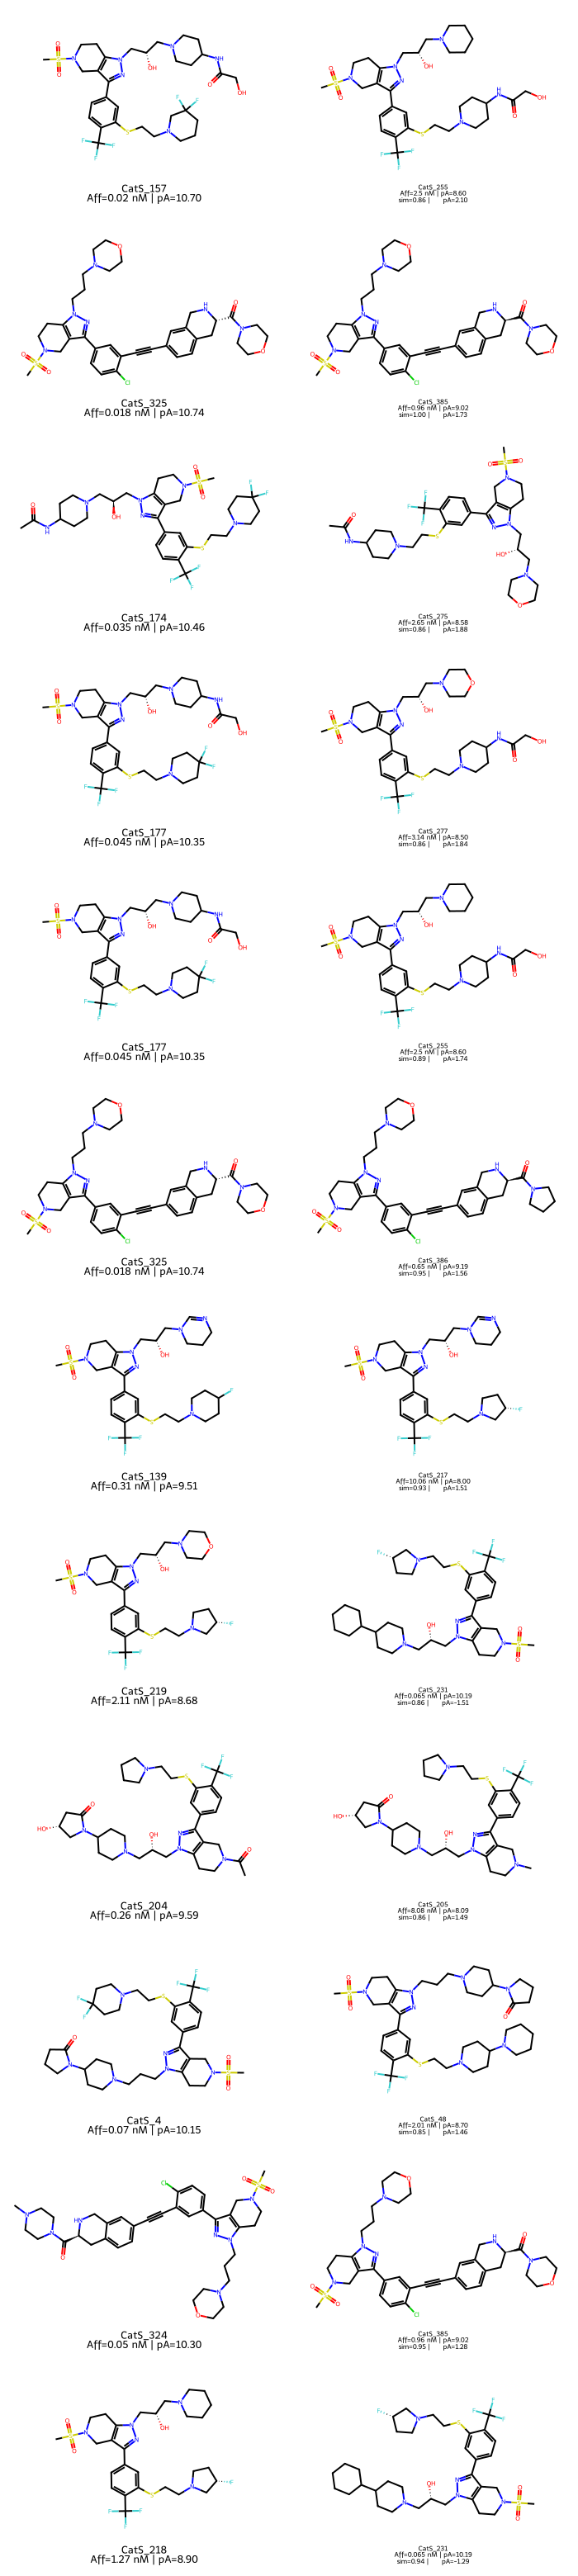

In [66]:
# How many cliff pairs to visualize
TOP_K_PAIRS = 12  # shows 24 molecules total

pairs = cliffs[:TOP_K_PAIRS]

mols = []
legends = []

for i, j, sim, dp, score in pairs:
    mol_i = df.at[i, "mol"]
    mol_j = df.at[j, "mol"]

    id_i = df.at[i, "Cmpd_ID"]
    id_j = df.at[j, "Cmpd_ID"]

    aff_i = df.at[i, "Affinity"]
    aff_j = df.at[j, "Affinity"]

    p_i = df.at[i, "pAffinity"]
    p_j = df.at[j, "pAffinity"]

    mols.extend([mol_i, mol_j])
    legends.extend([
        f"{id_i}\nAff={aff_i:g} nM | pA={p_i:.2f}",
        f"{id_j}\nAff={aff_j:g} nM | pA={p_j:.2f}\nsim={sim:.2f} | ΔpA={dp:.2f}"
    ])

img = Draw.MolsToGridImage(
    mols,
    legends=legends,
    molsPerRow=2,          # each pair in a row
    subImgSize=(350, 260)
)
img


Similarity heatmap (ECFP4 Tanimoto)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

In [68]:
#df = pd.read_csv("data_with_mmff_energy_logp.csv").dropna(subset=["SMILES"])
df["mol"] = df["SMILES"].apply(Chem.MolFromSmiles)
df = df.dropna(subset=["mol"]).reset_index(drop=True)

In [69]:
# Optional: keep it manageable (heatmap becomes huge if you have many molecules)
N = min(200, len(df))  # change to 100/300 as you like
df = df.head(N).copy()

[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerator
[14:46:28] DEPRECATION WARNING: please use MorganGenerat

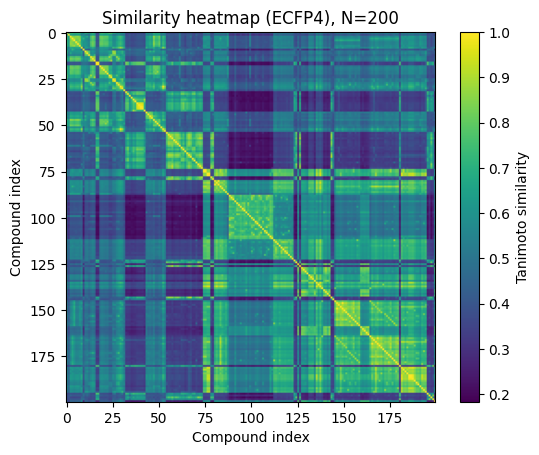

In [70]:
fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in df["mol"]]

sim = np.zeros((N, N), dtype=float)
for i in range(N):
    sim[i, :] = DataStructs.BulkTanimotoSimilarity(fps[i], fps)

plt.figure()
plt.imshow(sim)
plt.title(f"Similarity heatmap (ECFP4), N={N}")
plt.xlabel("Compound index")
plt.ylabel("Compound index")
plt.colorbar(label="Tanimoto similarity")
plt.show()


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

In [74]:
#df = pd.read_csv("data_with_mmff_energy_logp.csv").dropna(subset=["SMILES", "Affinity"])
df = df[df["Affinity"] > 0].copy()
df["mol"] = df["SMILES"].apply(Chem.MolFromSmiles)
df = df.dropna(subset=["mol"]).reset_index(drop=True)

In [75]:
def murcko(smiles):
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        return None
    sc = MurckoScaffold.GetScaffoldForMol(m)
    if sc is None or sc.GetNumAtoms() == 0:
        return None
    return Chem.MolToSmiles(sc)

df["Scaffold"] = df["SMILES"].apply(murcko)
df = df.dropna(subset=["Scaffold"])

C:\Users\Boobalan\AppData\Local\Temp\ipykernel_4856\403226.py:15: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



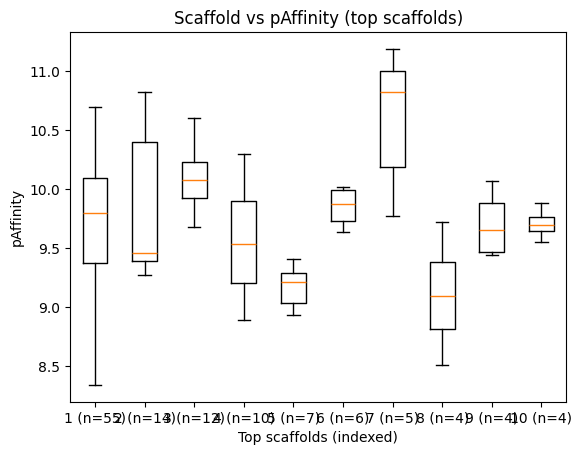

1 c1cc(SCCN2CCCCC2)cc(-c2nn(CCCN3CCCCC3)c3c2CNCC3)c1 count= 55
2 c1ccc(N2CCN(CCCn3nc(-c4cccc(SCCN5CCCCC5)c4)c4c3CCNC4)CC2)cc1 count= 14
3 C(#Cc1cccc(-c2nn(CCCN3CCCCC3)c3c2CNCC3)c1)c1ccc(CNCc2ccccc2)cc1 count= 12
4 O=C1CCCN1C1CCN(CCCn2nc(-c3cccc(SCCN4CCCCC4)c3)c3c2CCNC3)CC1 count= 10
5 C(#Cc1cccc(-c2nn(CCCN3CCOCC3)c3c2CNCC3)c1)c1ccccc1 count= 7
6 c1ccc(C2CCN(CCCn3nc(-c4cccc(SCCN5CCCCC5)c4)c4c3CCNC4)CC2)cc1 count= 6
7 c1ccc(C2CCN(CCCn3nc(-c4cccc(SCCN5CCCCC5)c4)c4c3CCNC4)CC2)nc1 count= 5
8 O=C1CCCN1C1CCN(CCCn2nc(-c3ccccc3)c3c2CCNC3)CC1 count= 4
9 C(#Cc1cccc(-c2nn(CCCN3CCNCC3)c3c2CNCC3)c1)c1ccc(CNCc2ccccc2)cc1 count= 4
10 c1cc(SCCN2CCCCC2)cc(-c2nn(CCCN3CCCCCC3)c3c2CNCC3)c1 count= 4


In [76]:
# choose top scaffolds by frequency
counts = Counter(df["Scaffold"])
topN = 10
top_scafs = [s for s, n in counts.most_common(topN)]

sub = df[df["Scaffold"].isin(top_scafs)].copy()

# Use pAffinity for nicer scale (optional)
sub["pAffinity"] = -np.log10(sub["Affinity"] * 1e-9)

# Build data for boxplot (one list per scaffold)
groups = [sub[sub["Scaffold"] == s]["pAffinity"].values for s in top_scafs]

plt.figure()
plt.boxplot(groups, labels=[f"{i+1} (n={counts[s]})" for i, s in enumerate(top_scafs)], showfliers=False)
plt.xlabel("Top scaffolds (indexed)")
plt.ylabel("pAffinity")
plt.title("Scaffold vs pAffinity (top scaffolds)")
plt.xticks(rotation=0)
plt.show()

# (Optional) Print mapping index -> scaffold SMILES
for i, s in enumerate(top_scafs, start=1):
    print(i, s, "count=", counts[s])
